In [419]:
import numpy as np
import matplotlib.pyplot as plt
from random import gauss

In [420]:
R = 40e6  #Ohm
C = 250e-12 #F

V_rep = -70e-3 #V
V_L = -50e-3   #V
V_redef = -65e-3   #V
V0 = V_rep  #V

tau_ref = 2e-3     #s
dt = 0.01e-3   #s
tmax = 2    #s

interacoes = round(tmax/dt)

In [421]:
def corrente(t, I):
    return I*(t>=0)


def solucao_semdisparo(I, interacoes, sigma, dt):
    V = np.zeros(interacoes)
    V[0] = V0

    for i in range(interacoes-1):
        w_n = gauss(0,1)
        V[i+1] = V[i] + dt * ( 1/R * (V_rep - V[i]) + I[i] ) / C + ( sigma * w_n * np.sqrt(dt) )

    return V


def solucao_comdisparo(I, interacoes, sigma, dt):
    V = np.zeros(interacoes)
    tempos_disparos = []
    V[0] = V0

    for i in range(interacoes-1):
        w_n = gauss(0,1)

        V[i+1] = V[i] + dt * ( 1/R * (V_rep - V[i]) + I[i] ) / C + ( sigma * w_n * np.sqrt(dt) )

        if V[i+1] >= V_L:
            V[i] = 0
            V[i+1] = V_redef
            tempos_disparos.append(t[i])
        else:
            V[i+1] = V[i] + dt * ( 1/R * (V_rep - V[i]) + I[i] ) / C + ( sigma * w_n * np.sqrt(dt) )

    return V, tempos_disparos


def intervalos_entre_disparos(tempos_disparos):
    ISI = []

    for i in range(1, len(tempos_disparos)):
        intervalo = tempos_disparos[i] - tempos_disparos[i-1]
        ISI.append(intervalo)

    return ISI

In [422]:
t = np.arange(0, tmax, dt)

I_acima = 510e-12   #A
I_abaixo = 390e-12  #A

sigma = 30e-3

I1 = corrente(t, I_acima)
I2 = corrente(t, I_abaixo)

In [423]:
V1, tempos_disparos1 = solucao_comdisparo(I1, interacoes, sigma, dt)
ISI1 = intervalos_entre_disparos(tempos_disparos1)

V2, tempos_disparos2 = solucao_comdisparo(I2, interacoes, sigma, dt)
ISI2 = intervalos_entre_disparos(tempos_disparos2)

V3 = solucao_semdisparo(I1, interacoes, sigma, dt)
V4 = solucao_semdisparo(I2, interacoes, sigma, dt)

VL = np.full(interacoes, V_L)

In [424]:
CV_ISI1 = np.std(ISI1)/ np.average(ISI1)
CV_ISI2 = np.std(ISI2)/ np.average(ISI2)

In [425]:
plt.style.use('bmh')

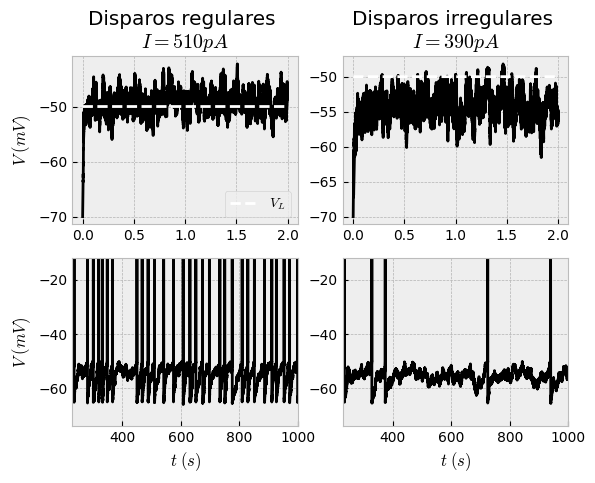

In [428]:
plt.figure()

plt.subplot(2,2,1)
plt.title(f'Disparos regulares \n$I = 510pA$')
plt.plot(t, V3*1e3, 'k')
plt.plot(t, VL*1e3, 'w--', label='$V_L$')
plt.ylabel(r'$V \; (mV)$')
plt.legend()

plt.subplot(2,2,2)
plt.title(f'Disparos irregulares \n$I =390pA$')
plt.plot(t, V4*1e3, 'k')
plt.plot(t, VL*1e3, 'w--', label='$V_L$')

plt.subplot(2,2,3)
plt.plot(t*1e3, V1*1e3, 'k')
plt.ylabel(r'$V \; (mV)$')
plt.xlabel(r'$t \; (s)$')
plt.axis(xmin=230, xmax=1000, ymax=-12)

plt.subplot(2,2,4)
plt.plot(t*1e3, V2*1e3, 'k')
plt.xlabel(r'$t \; (s)$')
plt.axis(xmin=230, xmax=1000, ymax=-12)


plt.show()

In [427]:
print(
    f'Coeficiente de variação dos intervalos entre disparos\n'
    f'Para a corrente acima, C = {CV_ISI1}\n'
    f'Para a corrente abaixo, C = {CV_ISI2}'
)

Coeficiente de variação dos intervalos entre disparos
Para a corrente acima, C = 0.44067592643887327
Para a corrente abaixo, C = 0.7371161539709621
